<a href="https://colab.research.google.com/github/Shamiul-693/Predicting-Cryptocurrency-Prices/blob/main/Predicting_Cryptocurrency_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Predicting Cryptocurrency Prices/Bitcoin.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
std,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07
min,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB


In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')


In [7]:
print(df.isnull().sum())   # Count missing values per column


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


## Summary statistics

In [10]:

print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())


               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%    41782.333984  42749.439453  40890.394531  41782.333984  4.076471e+07
max    67470.437500  85563.984375  66072.343750  67502.421875  5.791706e+08


# Correlation matrix

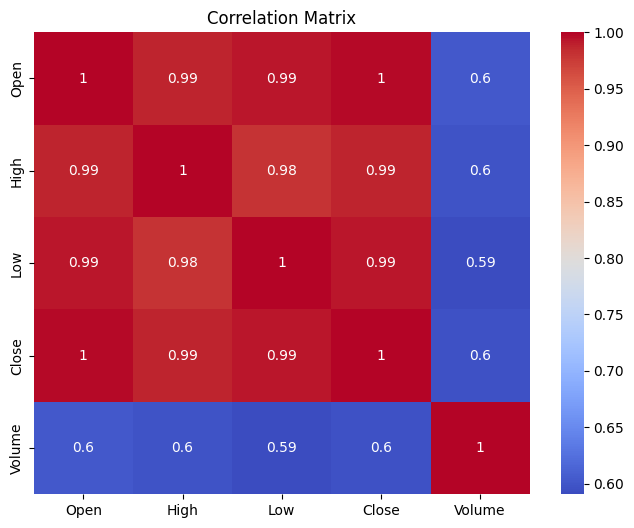

In [11]:
# Correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Consider creating additional time-series features to improve the model

In [12]:
# Moving averages
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['14_day_MA'] = df['Close'].rolling(window=14).mean()

# Daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Volatility
df['Volatility'] = df['High'] - df['Low']

print(df.head())


         Date          Open          High           Low         Close  \
0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  7_day_MA  14_day_MA  Daily_Return   Volatility  
0  952850.0      USD       NaN        NaN           NaN   161.157227  
1  131077.0      USD       NaN        NaN      0.023109   226.583008  
2   83052.0      USD       NaN        NaN      0.026721   364.272461  
3   76227.0      USD       NaN        NaN      0.063955   604.101562  
4   84485.0      USD       NaN        NaN      0.058450  1087.824219  


#Visualize the price data over time series to identify trends, seasonality, and potential outliers.

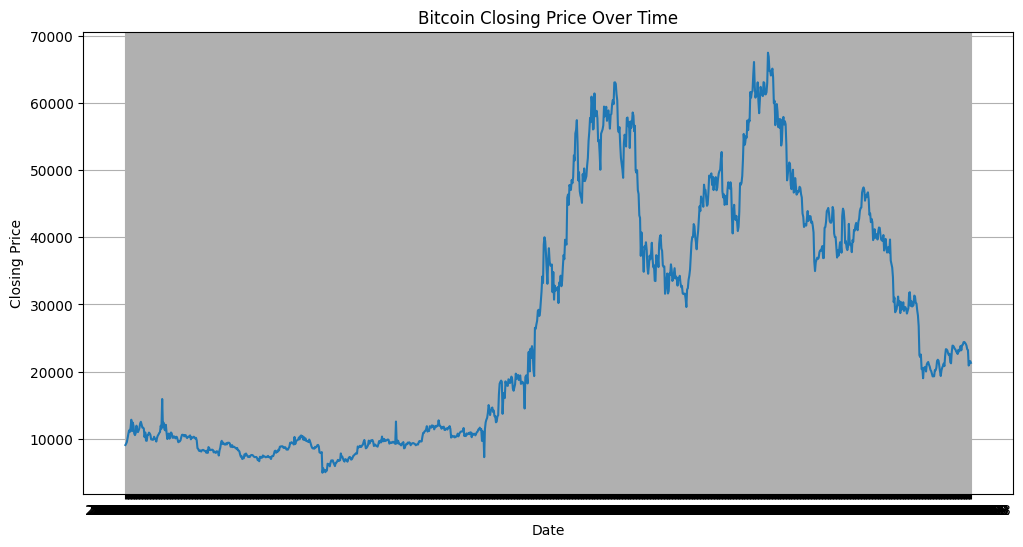

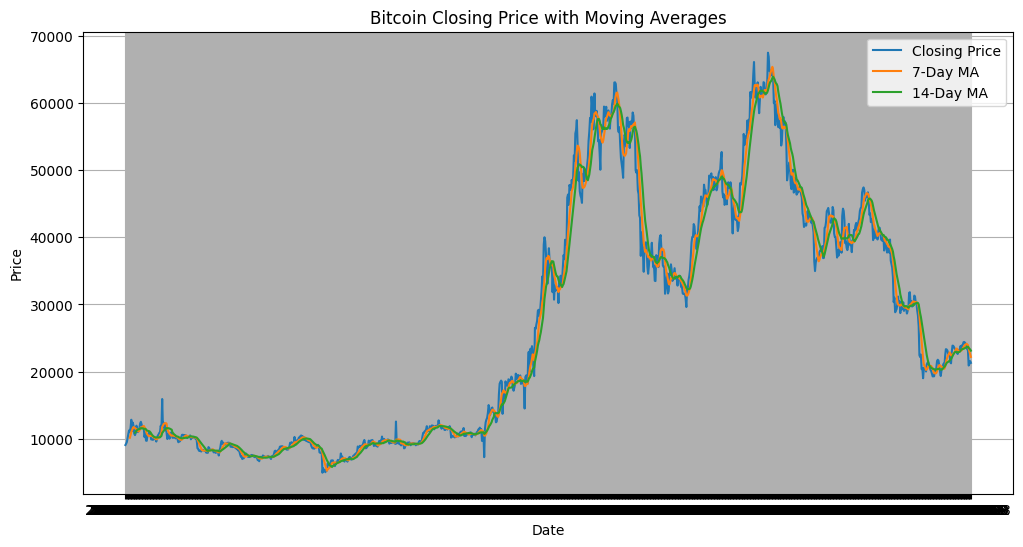

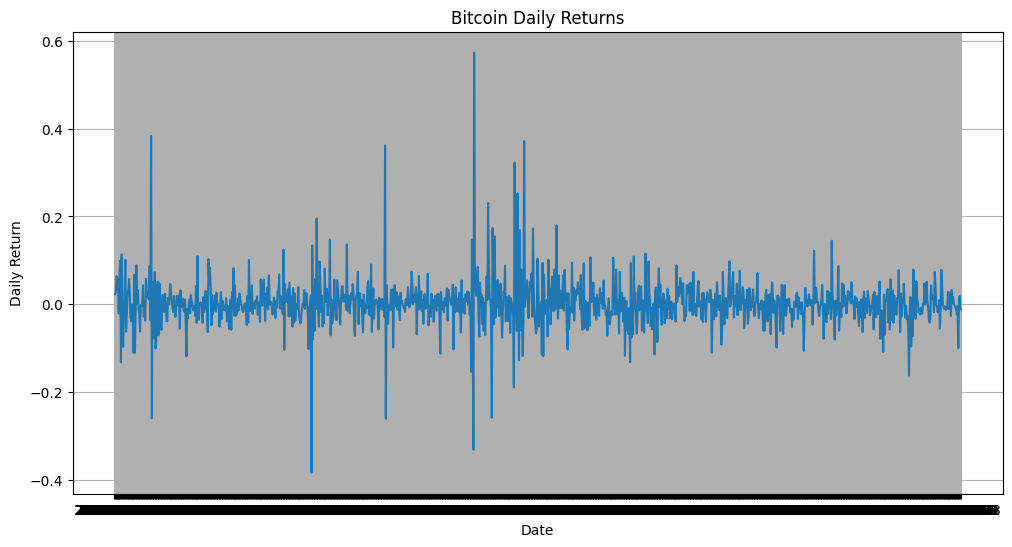

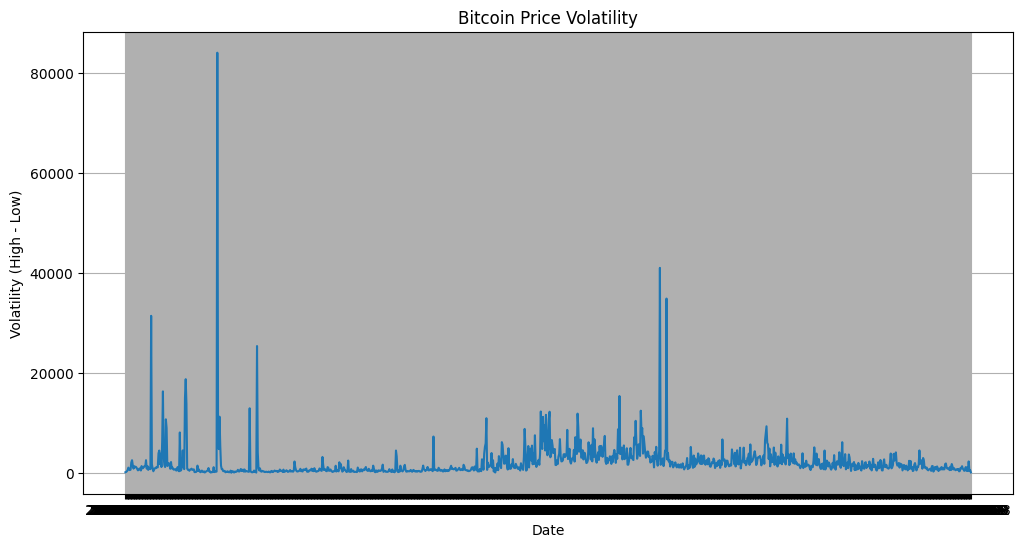

In [16]:


# Visualize closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.grid(True)
plt.show()

# Visualize moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['7_day_MA'], label='7-Day MA')
plt.plot(df['Date'], df['14_day_MA'], label='14-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Bitcoin Daily Returns')
plt.grid(True)
plt.show()

# Visualize volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility (High - Low)')
plt.title('Bitcoin Price Volatility')
plt.grid(True)
plt.show()

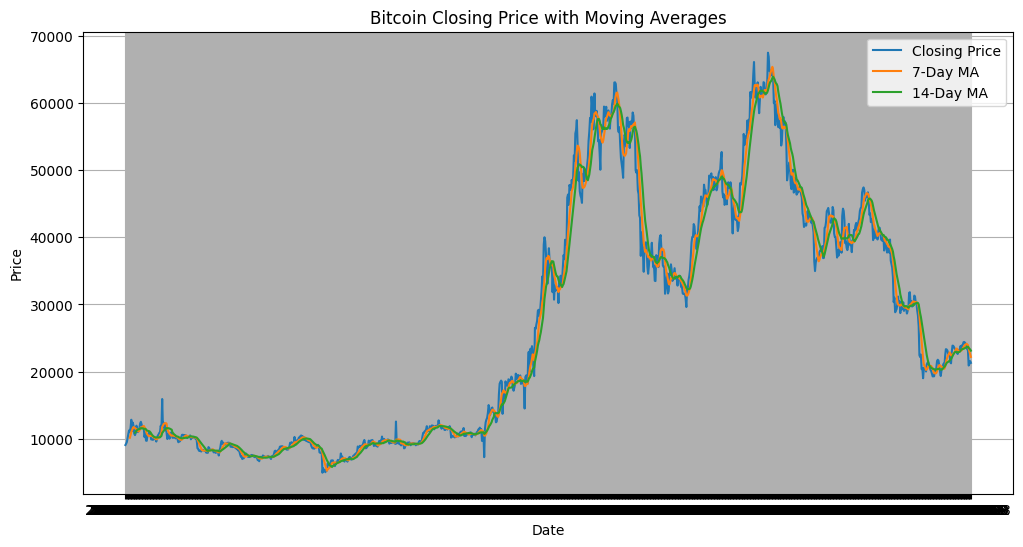

In [18]:
# Visualize moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['7_day_MA'], label='7-Day MA')
plt.plot(df['Date'], df['14_day_MA'], label='14-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

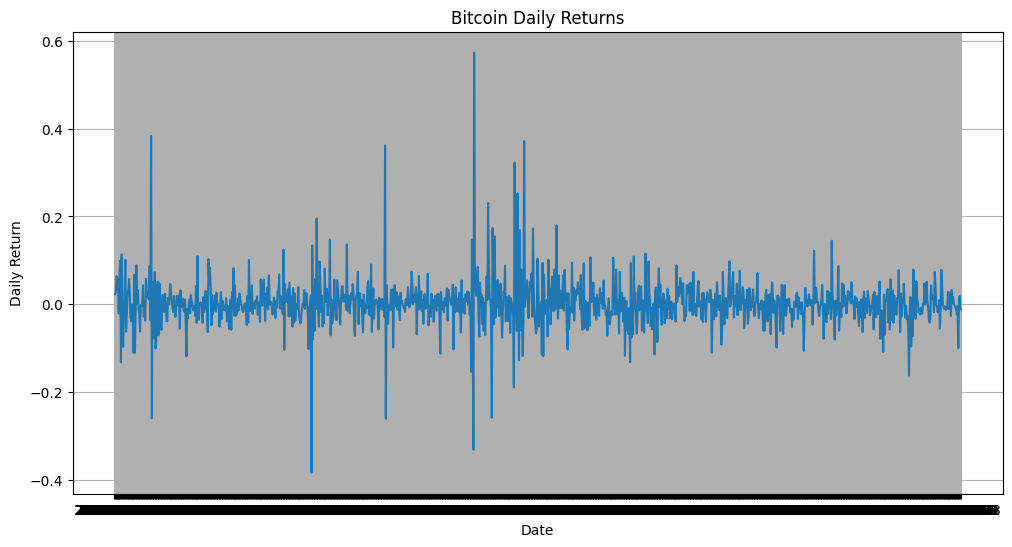

In [19]:
# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Bitcoin Daily Returns')
plt.grid(True)
plt.show()